<a href="https://colab.research.google.com/github/void-dono/anime-analysis/blob/main/anime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions


1.   Which Type of anime is in the dataset?
2.   Which and how much of Source materials is in dataset?
3.   How many anime are there for each Studio? 





In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
!pip install pandas-bokeh
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [201]:
df= pd.read_csv('/content/MAL-data.csv')
df.reset_index(inplace=True) 

In [202]:
df['Source'].unique()

array([' Manga', ' Visual novel', ' Novel', ' Original', ' Light novel',
       ' Web manga', ' Other', ' Game', ' 4-koma manga', ' Music'],
      dtype=object)

### 1. Which Type of anime is in the dataset?

Now lets do the same thing to find out how many TV, Movies and OVAs are in top 500 entries

In [203]:
v1=df.groupby('Type')['index'].nunique()

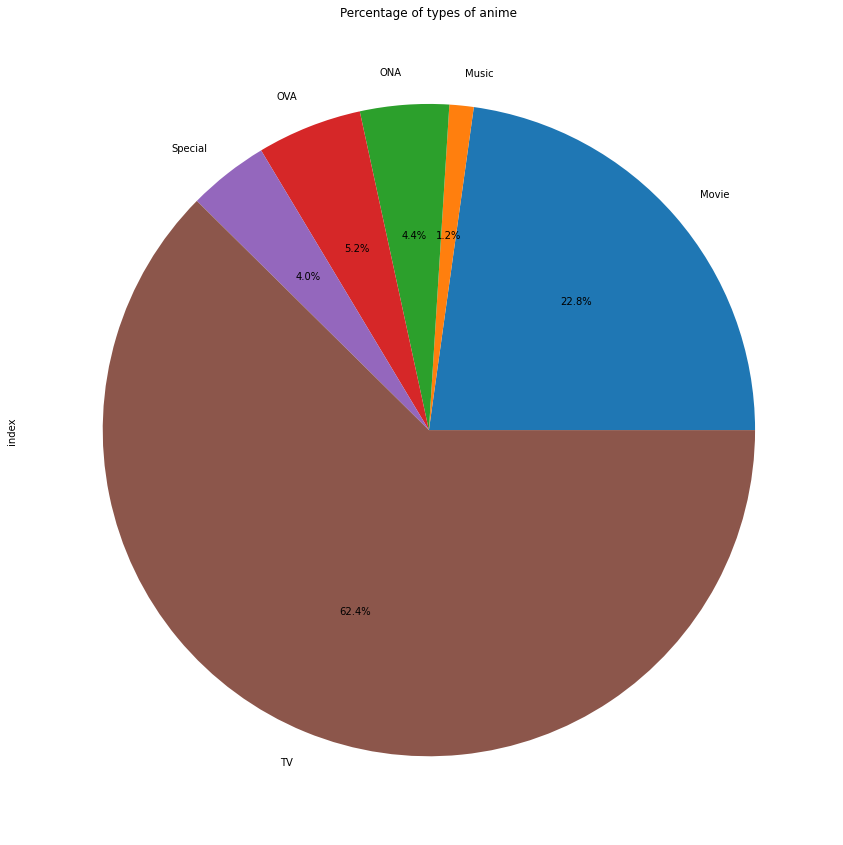

In [204]:
v1.plot.pie(autopct="%.1f%%", figsize=(20,15),title='Percentage of types of anime');

### 2.   Which and how much of Source materials is in dataset?

Now lets find out the number of source material types that made as anime.

In [205]:
v0 =df.groupby('Source')['index'].nunique()
vdf=pd.DataFrame({'Source':v0.index, 'number':v0.values})

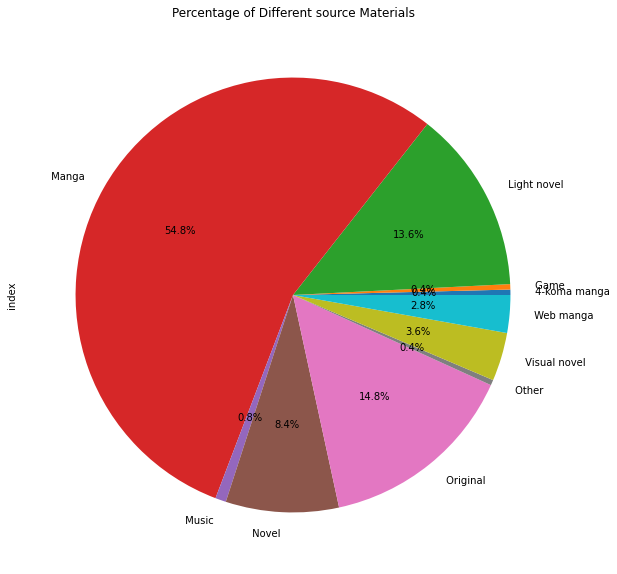

In [206]:
v0.plot.pie(autopct="%.1f%%",figsize=(10,10),title='Percentage of Different source Materials')

Now added I wanted to add inteactivity to chart. I found Bokeh Library is used to make interavtive plot so I tried it out. For this to work out i had to change the series to dataframe.

In [207]:
vdf.index=vdf['Source']
vdf.plot_bokeh.pie(y ='number')

__x__values_original


Figure(id='2697', ...)

As we can see that Manga has the highest converstion to anime followed by Original series which is not so surprising.

### 3.   How many anime are there for each Studio?

ValueError: ignored

<Figure size 1600x1440 with 0 Axes>

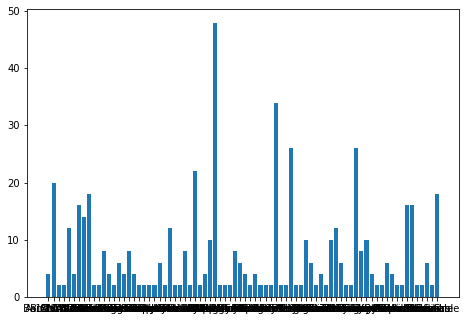

In [232]:
stu=df["Studio"].str.split(",", n = 3, expand = True)
stu=stu.unstack().reset_index(drop=True)
stu=pd.DataFrame(data=stu,columns=["Sources"])
stu = stu.fillna(value=np.nan)
stu=stu.dropna()
stu=stu.reset_index()
v2= stu.groupby('Sources')['index'].nunique()
v2=pd.DataFrame({'sources':v2.index, 'numberofprojects':v2.values})
v2.sort_values(by=['numberofprojects'])
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sources= v2['sources']
Projects= v2['numberofprojects']
ax.bar(Sources, Projects)
sns.barplot(x="Events", y = "Count" , data = v2)
plt.show()